# Air Quality Analysis of Thomas Fire

Author: Haejin Kim

Repository: https://github.com/khj9759/air_quality
    
## About

This project aims to generate a false color image illustrating the fire scar left by the 2017 Thomas fire. The task involves utilizing Air Quality Index (AQI) data from the US Environmental Protection Agency to visualize the impact of the Thomas Fire on air quality in Santa Barbara County.

## Highlights 
- Utilized Pandas for comprehensive data wrangling and exploration.
- Employed GeoPandas for efficient geospatial data manipulation.
- Developed and customized a choropleth map to visualize data spatially.
- Crafted legends using matplotlib.patches to enhance map readability.
- Leveraged rioxarray and xarray for efficient raster data handling and operations.

## About the data 

#### 1) Landsat Collection 2 Level-2 Atmospherically Corrected Surface Reflectance Data:
This dataset comprises simplified bands (red, green, blue, near-infrared, and shortwave infrared) derived from the Landsat Collection 2 Level-2 atmospherically corrected surface reflectance data, collected by the Landsat 8 satellite. The data underwent preprocessing in the Microsoft Planetary Computer, involving the removal of non-land data and spatial resolution reduction (Landsat Collection in MPC). It is intended for visualization purposes only.

#### 2) California State Fire Perimeters 2017:
A shapefile detailing fire perimeters in California during 2017. The complete file is accessible via the CA state geoportal.

#### 3) Air Quality Data for 2017 and 2018:
This dataset was obtained from the EPA data portal. It contains 10 columns with information about statename, countyname, AQI, Defining Parameter, and Date. For the purpose of this analysis, the following columns will be utilized:

- state_name
- county_name
- AQI
- Defining_Parameter
- Date

## Final Output

This document aims to produce two main outputs:
1) Create a graph of the Daily AQI and 5-Day Average
<img src="image/AQI_SB.png" alt="Example Image" width="400">

2) Mapping the Thomas Fire area in Santa Barbara
<img src="image/Thomas_fire_map.png" alt="Example Image" width="400">




## Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends

import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

from rasterio.features import rasterize # for rasterizing polygons

In [2]:
pd.set_option('display.max_columns', None)

# Import Data

In [3]:
# air quality data from EPA
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

# combine two data in one dataset
aqi = pd.concat([aqi_17, aqi_18], ignore_index=True)

In [4]:
# open landsat perimeters in california
landsat = rioxr.open_rasterio('data/landsat8-2018-01-26-sb-simplified.nc')
landsat

<xarray.Dataset>
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [5]:
# open fire perimeters in california
ca_fire = gpd.read_file(os.path.join(os.getcwd(), 'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp'))
ca_fire

index  OBJECTID YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM  \
0    19836     41429  2017    CA    CCO     VNC     BROOK  00042450   
1    19837     41430  2017    CA    CCO     VNC   PACIFIC  00075307   
2    19838     41431  2017    CA    CCO     VNC     GRADE  00054660   
3    19839     41432  2017    CA    CCO     VNC  PACIFICA  00051791   
4    19840     41433  2017    CA    CCO     VNC  MONTVIEW  00040196   
..     ...       ...   ...   ...    ...     ...       ...       ...   
603  21902     43888  2017    CA    FWS     BRR   STUBBLE  00002027   
604  21903     43889  2017    CA    CCO     KRN    HUDSON  00027936   
605  21904     43890  2017    CA    FWS     ESR    HARKIN  00001704   
606  21905     43891  2017    CA    CDF     LMU     JONES  00000268   
607  21906     43892  2017    CA    USF     MDF      LAKE  00000794   

     ALARM_DATE   CONT_DATE  CAUSE  C_METHOD  OBJECTIVE    GIS_ACRES  \
0    2017-05-23  2017-05-24   14.0       1.0        1.0    10.043819   
1    2017-09-09  2017-09-09   14.0       1.0        1.0     1.190109   
2    2017-07-04  2017-07-05   14.0       6.0        1.0    47.194027   
3    2017-06-24  2017-06-24   14.0       1.0        1.0     1.158548   
4    2017-05-15  2017-05-15   14.0       6.0        1.0     2.893327   
..          ...         ...    ...       ...        ...          ...   
603  2017-07-27  2017-07-27    9.0       4.0        1.0     1.526605   
604  2017-07-18  2017-07-18   14.0       4.0        1.0  1175.391479   
605  2017-06-28  2017-06-28    4.0       4.0        1.0     2.568609   
606  2017-06-03  2017-06-03    7.0       4.0        1.0    42.079288   
607  2017-07-27  2017-08-30    1.0       4.0        1.0  4665.484863   

                                              COMMENTS  \
0                                     per walked track   
1    Final Walked track.  Small spot to the north east   
2                                                  NaN   
3                                            GPS track   
4    Rough per description.  waiting for walked GPS...   
..                                                 ...   
603                                               LAH8   
604                                              K506.   
605                                              K3JJ.   
606                                              K1F9.   
607                                                NaN   

                    COMPLEX_NA COMPLEX_IN  \
0                          NaN        NaN   
1                          NaN        NaN   
2                          NaN        NaN   
3                          NaN        NaN   
4                          NaN        NaN   
..                         ...        ...   
603                        NaN        NaN   
604                        NaN        NaN   
605                        NaN        NaN   
606                        NaN        NaN   
607  Modoc July Complex (K7YC)   00000671   

                                  IRWINID FIRE_NUM DECADES    SHAPE_Leng  \
0                                     NaN      NaN    2010   1246.055781   
1                                     NaN      NaN    2010    561.418202   
2                                     NaN      NaN    2010   2587.259697   
3                                     NaN      NaN    2010    501.178102   
4                                     NaN      NaN    2010    484.388887   
..                                    ...      ...     ...           ...   
603  96228AF8-4967-4AE1-B2CE-CDAC6C8B06EF      NaN    2010   1259.808533   
604  5E0922CD-59F0-40AE-B38B-96C556E09B21      NaN    2010  13992.274756   
605  52A10DF9-1856-463C-9026-F2E0CA972B75      NaN    2010    681.926849   
606  DD6A07B8-BC55-4FA2-82D5-2F1B01EDCFE9      NaN    2010   2977.885260   
607  59B6A762-648C-4A2B-A4EB-0CD056D2308A      NaN    2010  50390.534597   

       SHAPE_Area                                           geometry  
0    5.947367e+04  POLYGON ((-13229812.974 4046876.486, -13229786

## Prepare data 
First, we can take a look at `ca_fire` dataframe:  

In [6]:
# make column names small caps
ca_fire.columns = ca_fire.columns.str.lower()
print('column name of ca_fire: ',ca_fire.columns, "\n")

# re-assign the column names - .str.lower() makes them lower case
#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.lower()
aqi.columns = aqi.columns.str.replace(' ','_')
print('column name of aqi: ',aqi.columns, '\n')

column name of ca_fire:  Index(['index', 'objectid', 'year_', 'state', 'agency', 'unit_id', 'fire_name',
       'inc_num', 'alarm_date', 'cont_date', 'cause', 'c_method', 'objective',
       'gis_acres', 'comments', 'complex_na', 'complex_in', 'irwinid',
       'fire_num', 'decades', 'shape_leng', 'shape_area', 'geometry'],
      dtype='object') 

column name of aqi:  Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



## Data Clean
For the AQI data, narrow down the scope to focus on California and Santa Barbara. Remove unnecessary columns such as state_name, county_name, state_code, and county_code.

In [7]:
# new data frame 'aqi_sb' select only data California and Santa Barbara. 
aqi_sb = aqi[(aqi.state_name == 'California') & (aqi.county_name == 'Santa Barbara')].copy()

# remove `state_name`, `county_name`, `state_code` and `county_code` columns
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name','state_code','county_code'])

In [8]:
# covert precip.DATE column to timedate objects
aqi_sb.date = pd.to_datetime(aqi_sb.date)
aqi_sb = aqi_sb.set_index('date')

Indexing the DataFrame with a DateTime index.

In [9]:
# Check the updated index of aqi_sb and its data type
index_dtype = aqi_sb.index
print(index_dtype)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)


## Rolling Window Calculations
Utilize the `rolling()` method available for `pandas.Series` to perform rolling window calculations. Setting the parameter to '5D' specifies a window of 5 days, while the aggregator function `mean()` computes the mean over each window.

In [10]:
# we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

# Calculate the 5-day rolling mean of AQI and add it as a new column
aqi_sb['five_day_average']=aqi_sb.aqi.rolling('5D').mean()

# Display the DataFrame with the new 'five_day_average' column
print(aqi_sb)

            aqi  category defining_parameter defining_site  \
date                                                         
2017-01-01   39      Good              Ozone   06-083-4003   
2017-01-02   36      Good              Ozone   06-083-4003   
2017-01-03   71  Moderate               PM10   06-083-4003   
2017-01-04   34      Good              Ozone   06-083-4003   
2017-01-05   37      Good              Ozone   06-083-4003   
...         ...       ...                ...           ...   
2018-12-27   37      Good              Ozone   06-083-1025   
2018-12-28   39      Good              Ozone   06-083-1021   
2018-12-29   39      Good              Ozone   06-083-1021   
2018-12-30   39      Good              Ozone   06-083-1021   
2018-12-31   38      Good              Ozone   06-083-1021   

            number_of_sites_reporting  five_day_average  
date                                                     
2017-01-01                         12         39.000000  
2017-01-02         

## Update 
Utilize the `squeeze()` function followed by `drop()` to remove the specified band.

In [11]:
# original dimensions and coordinates
print(landsat.dims, landsat.coords,'\n')

# remove length 1 dimension (band)
landsat = landsat.squeeze()
print(landsat.dims, landsat.coords,'\n')

# remove coordinates associated to band
landsat = landsat.drop('band')
print(landsat.dims, landsat.coords)

Frozen({'band': 1, 'x': 870, 'y': 731}) Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 0 

Frozen({'x': 870, 'y': 731}) Coordinates:
    band         int64 1
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 0 

Frozen({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 0


## Matching Coordinate Reference Systems (CRS)
In order to generate the map, compare the CRS (Coordinate Reference Systems) of ca_fire and landsat, and ensure they have the same CRS by matching them.

In [12]:
# check CRS
print(f"california_fire: {ca_fire.crs} \nland sat: {landsat.rio.crs}\n")

# transform fishing_areas CRS to epsg:32611
ca_fire = ca_fire.to_crs(landsat.rio.crs)

print('match crs landsat and ca_fire?:', landsat.rio.crs == ca_fire.crs)

california_fire: EPSG:3857 
land sat: EPSG:32611

match crs landsat and ca_fire?: True


## Dissolve and Clipping
Aggregate the geometries based on the values of a column such as geometry and `fire_name`, assigning the resulting structure the name `fire_districts`.

Clip the landsat data to include only the areas within the boundaries of the `fire_districts`.

In [13]:
# dissolve by district
fire_districts = ca_fire[['geometry','fire_name']].dissolve(by='fire_name', as_index=False)
fire_districts

# clipping the ca perimeter only fire 
fire_districts_clip = landsat.rio.clip_box(*fire_districts.total_bounds)

## Clipping to the Area of Thomas Fire Exclusively
Clip the dataset to encompass solely the geographical extent affected by the Thomas Fire.

In [14]:
# Registered areas:
# print(ca_fire.fire_name.unique())

# Filter the 'fire_districts' dataset to obtain the area specifically related to the Thomas Fire
fire_thomas = fire_districts[fire_districts.fire_name == 'THOMAS']

## Plotting Daily AQI and 5-Day Average
Generate a line plot illustrating both the daily Air Quality Index (AQI) and the 5-day average. Overlay the 5-day average on the daily AQI data. Notably, December 2017 recorded substantially high AQI levels in Santa Barbara, CA. This observed surge in AQI is directly linked to the impact of the Thomas fire.

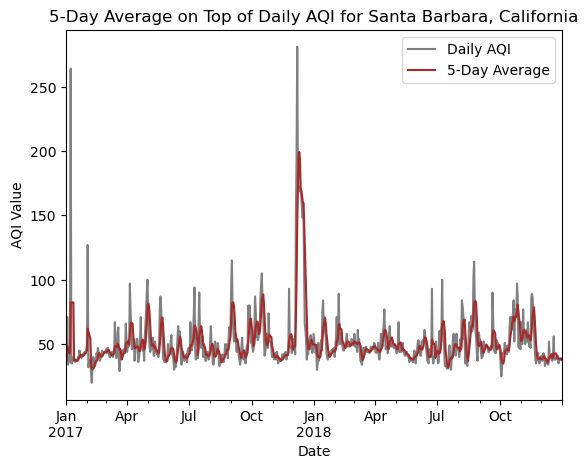

In [15]:
# initialize empty figure
fig, ax = plt.subplots()

# ---------------------------
# Create a line plot for daily AQI on the existing ax
aqi_sb.plot(y='aqi', ax=ax, label='Daily AQI', color='grey')

# Create a line plot for the 5-day average on the same ax
aqi_sb.plot(y='five_day_average', ax=ax, label='5-Day Average', color='brown')


# ----------------------------
# Set plot title and labels
ax.set_title('5-Day Average on Top of Daily AQI for Santa Barbara, California')
ax.set_xlabel('Date')
ax.set_ylabel('AQI Value')

# display figure
plt.show()
#plt.savefig('image/AQI_SB.png', bbox_inches='tight',  dpi=100)

## Map
Displays the false color image composed of shortwave infrared (SWIR), near-infrared (NIR), and red bands. Additionally, overlay the perimeter of the Thomas fire on this map.

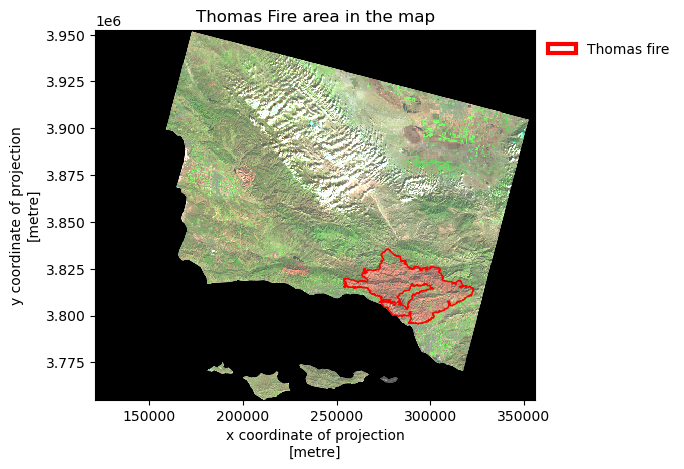

In [16]:

fig, ax = plt.subplots()

# ---------------------------------
# bring the clipping map
fire_districts_clip[['swir22','nir08','red']].to_array().plot.imshow(robust = True)


# bring the fire thomas map
fire_thomas.plot(ax=ax, edgecolor='red', color='none')

# ---------------------------------
# create the patch
fire_thomas_patch = mpatches.Patch(edgecolor='red', facecolor='none', linewidth=3,
                              label='Thomas fire')
 
# ---------------------------------
# Adding legend with custom label colors and settings
legend = ax.legend(handles=[fire_thomas_patch], frameon=False,loc='upper left', bbox_to_anchor= (1, 1))
ax.set_title('Thomas Fire area in the map')

plt.show()  
#plt.savefig('image/Thomas_fire_map.png', bbox_inches='tight',  dpi=100)